<a href="https://colab.research.google.com/github/angelaaaateng/AIR_AI_Engineering_Course_2024/blob/main/Day1/1_Processing_IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing Short Activity

**Instructions:**
1. Download the IMDB Dataset from here or directly from our Github [here](https://github.com/angelaaaateng/AIR_AI_Engineering_Course_2024/raw/refs/heads/main/Datasets/IMDB_Dataset.csv)
2. Tokenization with NLTK and SpaCy
3. Stopword Removal
4. Stemming & Lemmatization
5. Compare Results. Once you're done, look at the differences between NLTK and spaCy. Which approach do you think is more suitable for this dataset? What are some differences that you saw in these 2 packages?



In [4]:
# Import necessary libraries
import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load the IMDB dataset from Github
url = "https://github.com/angelaaaateng/AIR_AI_Engineering_Course_2024/raw/refs/heads/main/Datasets/IMDB_Dataset.csv"
data = pd.read_csv(url)

# Display the first few rows to understand the structure of the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Define functions for text preprocessing using NLTK
def preprocess_nltk(text):
    # Tokenization using NLTK
    tokens = word_tokenize(text)

    # Remove stopwords using NLTK's English stopword list
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming using PorterStemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return {'tokens': tokens, 'filtered_tokens': filtered_tokens, 'stemmed_tokens': stemmed_tokens, 'lemmatized_tokens': lemmatized_tokens}

In [7]:
# Define functions for text preprocessing using SpaCy
def preprocess_spacy(text, nlp):
    # Tokenization using SpaCy's language model
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # Remove stopwords using SpaCy's built-in stopword list
    filtered_tokens = [token.text for token in doc if token.text.lower() not in spacy_stopwords]

    # Lemmatization using SpaCy
    lemmatized_tokens = [token.lemma_ for token in doc]

    return {'tokens': tokens, 'filtered_tokens': filtered_tokens, 'lemmatized_tokens': lemmatized_tokens}

In [8]:
# Load SpaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Preprocess the first review using NLTK
nltk_preprocessed = preprocess_nltk(data['review'][0])
print("NLTK Preprocessed Output:\n", nltk_preprocessed)

# Preprocess the first review using SpaCy
spacy_preprocessed = preprocess_spacy(data['review'][0], nlp)
print("\nSpaCy Preprocessed Output:\n", spacy_preprocessed)


NLTK Preprocessed Output:
 {'tokens': ['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'They', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'Trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'Its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Se

In [9]:
# Compare NLTK and SpaCy results
print("\nComparison of NLTK and SpaCy Tokenization:")
print(f"NLTK Tokens: {nltk_preprocessed['filtered_tokens']}")
print(f"SpaCy Tokens: {spacy_preprocessed['filtered_tokens']}")
# SpaCy’s tokenization might differ because it can handle contractions like "isn't" as "is" and "n't", while NLTK may treat them as a single token.



Comparison of NLTK and SpaCy Tokenization:
NLTK Tokens: ['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', '.', 'right', ',', 'exactly', 'happened', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', ',', 'set', 'right', 'word', 'GO', '.', 'Trust', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pulls', 'punches', 'regards', 'drugs', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 'focuses', 'mainly', 'Emerald', 'City', ',', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'Em', 'City', 'home', 'many', '..', 'Aryans', ',', 'Muslims', ',', 'gangstas', ',', 'Latinos', ',', 'Christians', ',', 'Italians', ',', 'Irish', '....', 'scu

In [10]:

print("\nComparison of NLTK and SpaCy Lemmatization:")
print(f"NLTK Lemmatized Tokens: {nltk_preprocessed['lemmatized_tokens']}")
print(f"SpaCy Lemmatized Tokens: {spacy_preprocessed['lemmatized_tokens']}")
# SpaCy’s lemmatization tends to be more accurate and context-aware because it uses a more comprehensive rule-based approach and vocabulary. NLTK’s WordNetLemmatizer, in contrast, sometimes only reduces words to their base form without considering context.



Comparison of NLTK and SpaCy Lemmatization:
NLTK Lemmatized Tokens: ['One', 'reviewer', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', '.', 'right', ',', 'exactly', 'happened', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scene', 'violence', ',', 'set', 'right', 'word', 'GO', '.', 'Trust', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pull', 'punch', 'regard', 'drug', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 'focus', 'mainly', 'Emerald', 'City', ',', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'Em', 'City', 'home', 'many', '..', 'Aryans', ',', 'Muslims', ',', 'gangsta', ',', 'Latinos', ',', 'Christians', ',', 'Italians', ',', 'Irish', '....', 'scu

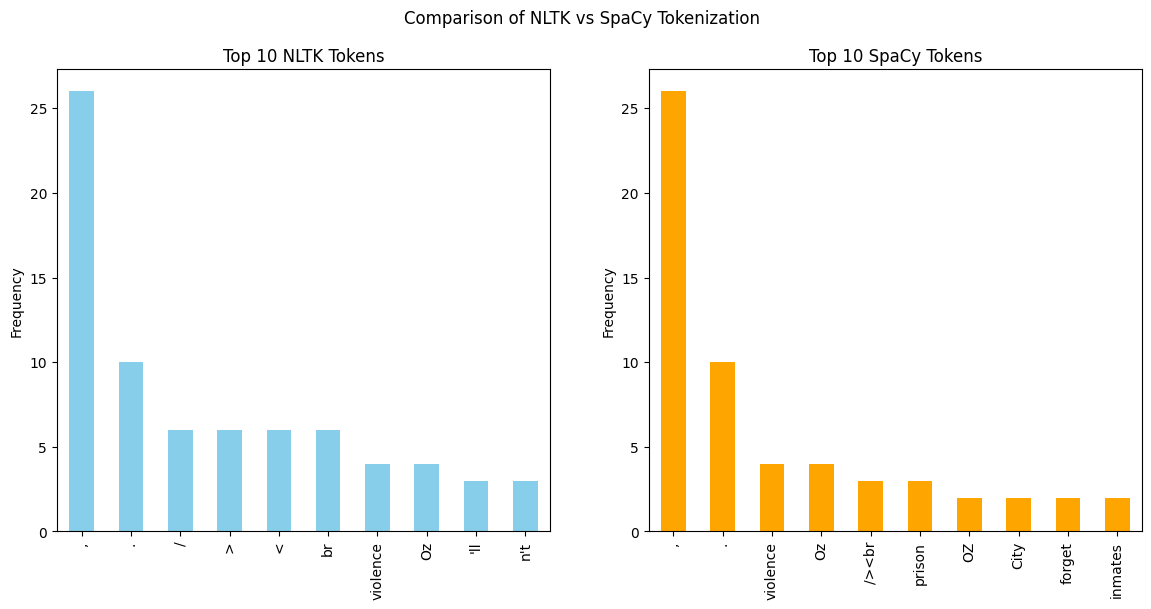

In [11]:

# Visual comparison of tokenization differences
nltk_tokens = nltk_preprocessed['filtered_tokens']
spacy_tokens = spacy_preprocessed['filtered_tokens']

# Plotting token frequency for comparison
plt.figure(figsize=(14, 6))
nltk_token_counts = pd.Series(nltk_tokens).value_counts().head(10)
spacy_token_counts = pd.Series(spacy_tokens).value_counts().head(10)

# Plot NLTK Token Frequencies
plt.subplot(1, 2, 1)
nltk_token_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 NLTK Tokens')
plt.ylabel('Frequency')

# Plot SpaCy Token Frequencies
plt.subplot(1, 2, 2)
spacy_token_counts.plot(kind='bar', color='orange')
plt.title('Top 10 SpaCy Tokens')
plt.ylabel('Frequency')

plt.suptitle('Comparison of NLTK vs SpaCy Tokenization')
plt.show()


Differences Between NLTK and spaCy:
1. **Ease of Use**:
   - **NLTK**: Offers more control and is modular, but can be more complex and requires manual setup for many tasks.
   - **spaCy**: Designed for fast, efficient NLP with pre-trained models, making it easier for practical applications.
2. **Performance**:
   - **NLTK**: Slower, especially for large datasets.
   - **spaCy**: Optimized for performance, great for handling large text corpora quickly.
3. **Applications**:
   - **NLTK**: Ideal for research and experimentation, as it provides a wide range of tools and algorithms.
   - **spaCy**: Better suited for production-level applications where speed and ease of deployment are critical.
In short:
- Use **NLTK** for flexibility and in-depth experimentation.
- Use **spaCy** when you need speed and ready-to-use NLP pipelines for production systems.

